In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import numpy as np
image_dir = r"C:\Users\harip\Downloads\Banana FCN\Banana FCN\Images"
mask_dir =  r"C:\Users\harip\Downloads\Banana FCN\Banana FCN\Mask"

In [2]:
image_ds = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    labels=None,
    image_size=(128,128),
    batch_size=None,
    shuffle=False
)

# Load masks
mask_ds = tf.keras.utils.image_dataset_from_directory(
    mask_dir,
    labels=None,
    color_mode='grayscale',
    image_size=(128,128),
    batch_size=None,
    shuffle=False
)
dataset = tf.data.Dataset.zip((image_ds, mask_ds))

Found 82 files.
Found 82 files.


In [3]:
images = []
masks = []
for img, mask in dataset:
    images.append(img.numpy())
    masks.append(mask.numpy())

images = np.array(images) / 255.0  # Normalize
masks = np.array(masks) / 255.0   # Normalize
masks = (masks > 0.5).astype(np.float32)  # Binary mask
     

In [4]:
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)
model = tf.keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(128, 128, 3)),
        layers.Conv2D(1, 1, activation='sigmoid', padding='same')
    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, #sastra bro
    batch_size=8,
    verbose=1
)

Epoch 1/10


C:\Users\harip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3644 - loss: 0.7450 - val_accuracy: 0.7012 - val_loss: 0.6327
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7097 - loss: 0.6200 - val_accuracy: 0.6938 - val_loss: 0.5787
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7091 - loss: 0.5750 - val_accuracy: 0.6938 - val_loss: 0.5675
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7111 - loss: 0.5652 - val_accuracy: 0.6938 - val_loss: 0.5668
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7085 - loss: 0.5689 - val_accuracy: 0.6938 - val_loss: 0.5617
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7066 - loss: 0.5679 - val_accuracy: 0.6938 - val_loss: 0.5556
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7047 - loss: 0.5628 - val_accuracy: 0.6938 - val_loss: 0.5506
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7120 - loss: 0.5560 - val_accuracy: 0.6938 - val_loss: 0.5461
Epoch 9/10


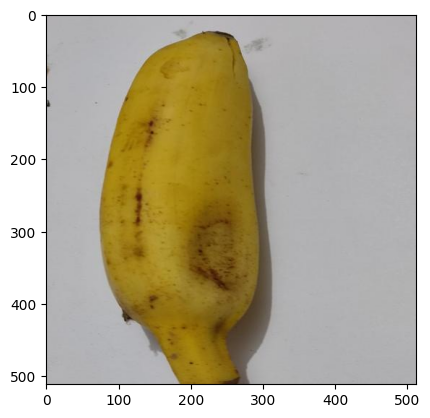

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\harip\Downloads\Banana FCN\Banana FCN\Images\Images\76.jpg")
plt.imshow(img)

In [9]:
def predict_mask(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(128, 128))
    img = tf.keras.utils.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    predicted_mask = model.predict(img)
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8) * 255

    return predicted_mask[0, :, :, 0]

predict_mask(r"C:\Users\harip\Downloads\Banana FCN\Banana FCN\Mask\Mask\76_mask.png")
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)